In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
dataset = pd.read_csv('C:/Users/Gray/Desktop/dataset/Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [5]:
dataset['Gender'] = np.where(dataset['Gender'] =='Male', 1, dataset['Gender'])
dataset['Gender'] = np.where(dataset['Gender'] =='Female', 0, dataset['Gender'])

In [6]:
dataset['Gender']
dataset["Gender"] = dataset["Gender"].astype('int64')
dataset['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [7]:
df = dataset.iloc[:, :]
corrmat = df.corr()

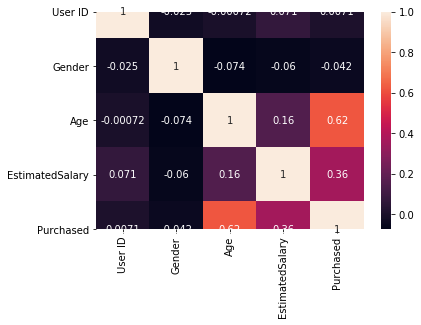

In [8]:
sn.heatmap(corrmat, annot=True)
plt.show()

In [9]:
X = dataset.iloc[: , [ 1, 2, 3]]
Y = dataset.iloc[:, [4]]

In [10]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [11]:
Y.shape

(400, 1)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state = 5)

In [13]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_train = np.array((Y_train))
Y_test.reshape(-1, 1)
Y_train.reshape(-1,1)

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [14]:
print('{} {} {} {}'.format(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape))

(320, 3) (80, 3) (320, 1) (80, 1)


In [15]:
def normalise(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis=0)
    X = (X-mean)/std
    print(mean)
    print(std)
    return X

def biasing(x):
    n = x.shape[0]
    arr = np.ones((n, 1))
    x = np.hstack((arr, x))
    return x

In [16]:
X_train = normalise(X_train)

[4.8750000e-01 3.7865625e+01 6.9556250e+04]
[4.99843726e-01 1.05132687e+01 3.35861294e+04]


In [17]:
X_train

array([[-0.97530483, -0.27257222,  0.81711559],
       [ 1.02532046, -0.27257222,  1.14463175],
       [-0.97530483,  0.48837095,  1.26372853],
       [ 1.02532046, -1.12863329, -1.11820715],
       [-0.97530483, -1.41398698, -0.64182001],
       [ 1.02532046,  2.10537519, -0.82046519],
       [ 1.02532046, -1.69934067,  0.13230908],
       [ 1.02532046, -0.17745433, -0.28452966],
       [-0.97530483, -0.27257222,  0.07276069],
       [ 1.02532046, -1.69934067,  0.48959944],
       [-0.97530483, -0.17745433, -0.46317484],
       [-0.97530483,  1.6297857 ,  1.65079308],
       [-0.97530483, -0.08233643,  0.31095426],
       [-0.97530483, -0.08233643, -0.37385225],
       [ 1.02532046, -1.88957646, -0.52272323],
       [ 1.02532046,  0.01278147,  0.0429865 ],
       [ 1.02532046, -0.27257222, -0.58227162],
       [-0.97530483, -0.55792591,  1.41259951],
       [ 1.02532046,  2.01025729,  2.18672861],
       [ 1.02532046,  0.77372464, -1.23730393],
       [ 1.02532046,  0.77372464, -1.386

In [18]:
def sigmoid_func(theta, x):
    temp = x@theta
    return 1/(1 + np.exp(-temp))

## In python it is defined as :
def sigmoid(X):
    ##write your code to complete sigmoid function
    sig_X = 1/(1+ np.exp(-X))
    return sig_X

In [19]:
def likelihood(x, y, w):
    sig = np.log(sigmoid_func(w, x))
    #print(sig)
    part1 = y.T@sig
    part2 = ((1-y).T)@np.log(1 - sigmoid_func(w, x))
    return part1+part2

def cost_fun(y,h):
    ## write your code for cost function
    cost = -y*np.log(h) - (1-y)*np.log(1-h)
    cost = np.mean(cost)
    return cost

In [20]:
def gradient_ascent(x, y, w, alpha, itr):
    J = []
    initial = np.sum(likelihood(x, y, w))
    J.append(initial)
    N = x.shape[0]
    for i in range(0, itr):
        d = (y - sigmoid_func(w, x))
        w = w + (alpha*x.T@d)/N
        cost = likelihood(x, y, w)
        J.append(np.sum(cost))
    return J, w


In [21]:
theta = np.zeros((X_train.shape[1]+1, 1))
theta.shape

(4, 1)

In [22]:
X_train1 = biasing(X_train)
J, w1 = gradient_ascent(X_train1, Y_train, theta, 0.09, 1000)

In [23]:
Y_train.shape
print(w1)

[[-1.02206281]
 [ 0.18698165]
 [ 2.43553468]
 [ 1.21365863]]


In [24]:
print(J)

[-221.80709777918247, -217.83499189297504, -214.05911580429168, -210.46934973337443, -207.05587847286895, -203.80922953385064, -200.72030127805488, -197.78038215860653, -194.98116223042416, -192.31473807608074, -189.77361223775722, -187.35068816392388, -185.0392615813241, -182.83300909734544, -180.72597473145532, -178.7125549717182, -176.78748285659537, -174.94581149510162, -173.18289736084301, -171.49438362767407, -169.87618375638982, -168.32446549239887, -166.8356353929108, -165.40632396794274, -164.03337149150218, -162.7138145167852, -161.44487311132153, -160.22393881398392, -159.0485633049965, -157.9164477719686, -156.82543294904906, -155.77348980212972, -154.75871083027107, -153.77930195188685, -152.8335749434595, -151.91994039847268, -151.03690117466806, -150.18304629853668, -149.35704529703054, -148.55764292774322, -147.7836542801947, -147.03396022230947, -146.3075031676617, -145.60328314054382, -144.92035411737237, -144.257820624362, -143.6148345727616, -142.99059231424877, -14

In [25]:
X_test = normalise(X_test)
X_test1 = biasing(X_test)
Y_pred = sigmoid_func(w1, X_test1)
Y_pred

[5.00000e-01 3.68125e+01 7.04875e+04]
[5.00000000e-01 1.02507241e+01 3.58563083e+04]


array([[8.62642710e-01],
       [9.60557790e-04],
       [1.60583875e-01],
       [3.84945596e-03],
       [4.76291526e-01],
       [3.08523177e-01],
       [8.06377404e-02],
       [5.43942592e-01],
       [1.34978520e-01],
       [5.77279752e-01],
       [6.93599631e-01],
       [4.82809819e-02],
       [6.64996361e-02],
       [8.56454610e-02],
       [8.05654450e-02],
       [1.34916418e-03],
       [7.21134304e-01],
       [4.34507751e-01],
       [4.52923802e-02],
       [3.45745501e-01],
       [9.56524472e-01],
       [3.53369740e-01],
       [9.76106004e-01],
       [4.59361128e-01],
       [4.68436737e-01],
       [1.29728552e-02],
       [3.69522570e-01],
       [9.38508709e-01],
       [6.80686844e-01],
       [3.60427016e-03],
       [9.73372590e-01],
       [3.48364235e-03],
       [8.98394806e-01],
       [9.53943007e-03],
       [4.59361128e-01],
       [4.75466618e-01],
       [5.44348664e-01],
       [2.73369287e-01],
       [5.52567136e-01],
       [1.23092531e-01],


In [26]:
print(Y_test)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [27]:
# h = sigmoid_func(w1, X_test1) ## sigmoid function update
# print(h)
# theta -= 0.005/m*np.dot((h-(Y_test1)).T,X_test).T ## theta update
    
# h = sigmoid(np.dot(x_test,theta))

In [28]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, Y_test)
print(score)
print(predictions)

0.8375
[1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1
 0 0 0 0 0 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
res=[]
for i in range(0, Y_pred.shape[0]):
    if(Y_pred[i]>=0.5):
        res.append(1)
    else:
        res.append(0)
res

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [30]:
true = 0
false = 0
for i in range(Y_test.shape[0]):
    if(Y_test[i] == res[i]):
        true+=1
    else:
        false+=1

print(true/(true+false))

0.8375
